In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0)

In [6]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

data_set = Data()

In [8]:
class logistic_regression(nn.Module):
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)

    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

model = logistic_regression(1)

In [9]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.8230]])),
             ('linear.bias', tensor([-0.7359]))])

In [10]:
criterion = nn.BCELoss()
trainloader = DataLoader(dataset=data_set, batch_size=3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

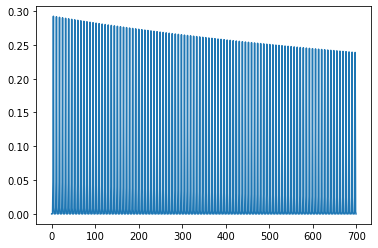

In [12]:
LOSS = []

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    plt.plot(LOSS)
    plt.show()

train_model(100)


In [13]:
yhat = model(data_set.x)
label = yhat > 0.5
accuracy = torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float))
print(f"accuracy={accuracy}")

accuracy=1.0
